In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [23]:
df = pd.read_csv('Churn_Modelling.csv')

In [24]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [26]:
df=df.drop(columns=["RowNumber","CustomerId","Surname"])


In [27]:
df=pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True,)
X=df.drop(columns=["Exited"])
y=df["Exited"]

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [30]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense




In [31]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='relu'))

/Users/owner/Desktop/deep-learning/deep_learning/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 408 (1.59 KB)

 Trainable params: 408 (1.59 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# notes
BATCH_SIZE


	•	It divides into groups of 50.
	•	Computes average loss/gradient per group.
	•	Updates weights from that average.
	•	Then moves on to the next group until the epoch finishes.

In [34]:
info = model.fit(x_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7850 - loss: 1.3496 - val_accuracy: 0.7731 - val_loss: 0.7103
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.7889 - loss: 0.6394 - val_accuracy: 0.8012 - val_loss: 0.5096
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.8000 - loss: 0.4855 - val_accuracy: 0.7975 - val_loss: 0.4870
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.7986 - loss: 0.4829 - val_accuracy: 0.7706 - val_loss: 0.5193
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.7916 - loss: 0.4954 - val_accuracy: 0.7969 - val_loss: 0.4924
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.8031 - loss: 0.4751 - val_accuracy: 0.7994 - val_loss: 0.4729
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.8023 - loss: 0.4615 - val_accuracy: 0.8006 - val_loss: 0.4624
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.8037 - loss: 0.4

In [35]:
y_pred=model.predict(x_test)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step


In [36]:
y_pred


array([[0.23618159],
       [0.26666448],
       [0.1354127 ],
       ...,
       [0.27694634],
       [0.05205799],
       [0.12966093]], shape=(2000, 1), dtype=float32)

In [37]:
# y_pred = y_pred.argmax(axis=-1)
# used to make the probability  to  classification numbers 

In [38]:
y_pred=np.where(y_pred>0.5, 1,0)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8565

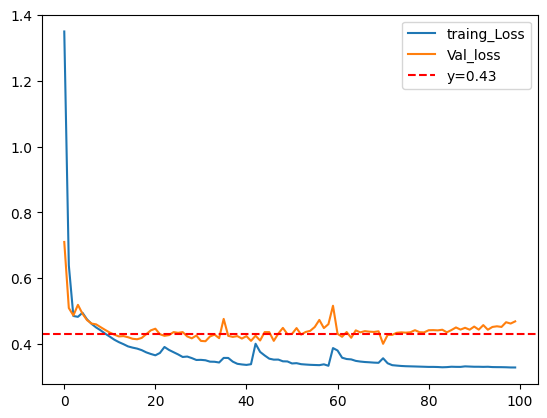

In [44]:


plt.plot(info.history['loss'],label='traing_Loss')
plt.plot(info.history['val_loss'],label='Val_loss')
plt.axhline(y=0.43, color='r', linestyle='--', label='y=0.43')
plt.legend()

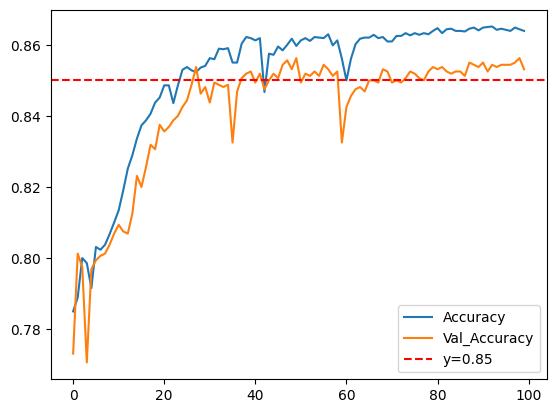

In [42]:
plt.plot(info.history['accuracy'],label='Accuracy')
plt.plot(info.history['val_accuracy'],label='Val_Accuracy')
plt.axhline(y=0.85, color='r', linestyle='--', label='y=0.85')
plt.legend()

good convergence.
	•	No major overfitting observed.